# TP8 - Données du projet - *correction*

#### Analyse de Données Massives - Master 1ère année


In [18]:
import pymongo
import pandas
from pprint import pprint
import seaborn
%matplotlib inline

In [16]:
con = pymongo.MongoClient("mongodb://193.51.82.104:2343/")
horo = con.horodateurs

## Mobiliers

### 1. Donner les différents types d'alimentation possible (`alim`) et le nombre d'horodateurs pour chaque. 

In [9]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : "$fields.alim", "nb" : { "$sum" : 1}}}
]))
pprint(res)

[{'_id': None, 'nb': 8},
 {'_id': 'PILE', 'nb': 2994},
 {'_id': 'SOLAIRE', 'nb': 4808}]


In [15]:
df = pandas.DataFrame(res) 
df.columns = ["Alimentation", "Effectif"]
df

,Alimentation,Effectif
0,None,8
1,PILE,2994
2,SOLAIRE,4808


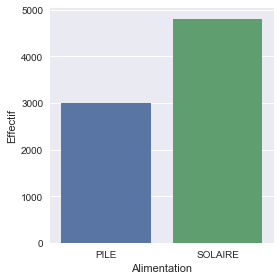

In [20]:
seaborn.factorplot(x = "Alimentation", y = "Effectif", data = df, kind = "bar")

### 2. Donner le nombre de mobiliers pour chaque arrondissement (`arrondt`)

In [36]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : "$fields.arrondt", "nb" : { "$sum" : 1}}},
    { "$sort" : { "_id": 1}}
]))

In [37]:
df = pandas.DataFrame(res) 
df.columns = ["Arrondissement", "Effectif"]

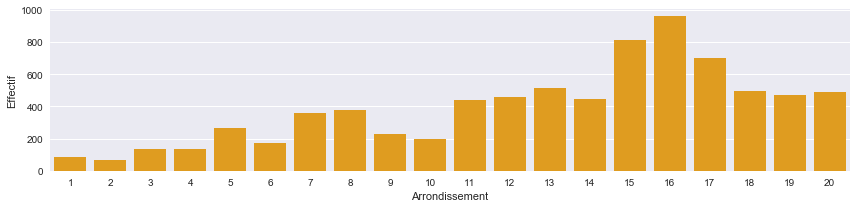

In [45]:
seaborn.factorplot(x = "Arrondissement", y = "Effectif", color = "orange",
                   data = df, kind = "bar", size = 3, aspect = 4)

### 3. Lister l'ensemble des modèles existants (`modele`)

In [44]:
horo.mobiliers.distinct("fields.modele")

['SAB3', 'SMB2', 'MUI']

In [50]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : "$fields.modele", "nb" : { "$sum" : 1}}},
    { "$sort" : { "nb": -1}}
]))

In [51]:
df = pandas.DataFrame(res) 
df.columns = ["Modèle", "Effectif"]

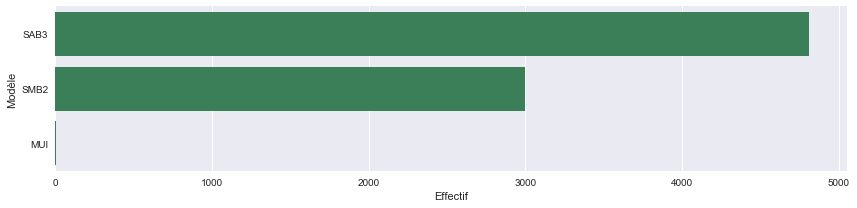

In [52]:
seaborn.factorplot(y = "Modèle", x = "Effectif", color = "seagreen",
                   data = df, kind = "bar", size = 3, aspect = 4)

### 4. Croiser le régime (`regime`) et les arrondissements pour voir s'il y a des différences notables

In [63]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : { "reg" : "$fields.regime", "arr" : "$fields.arrondt"}, "nb" : { "$sum" : 1}}},
    { "$project": { "regime" : "$_id.reg", "arrondissement" : "$_id.arr", "effectif" : "$nb" }},
    { "$sort" : { "arrondissement" : 1}}
]))
df = pandas.DataFrame(res).drop("_id", 1)
df.head()

,arrondissement,effectif,regime
0,1,24,ROT
1,1,63,MIX
2,2,18,ROT
3,2,49,MIX
4,3,82,MIX


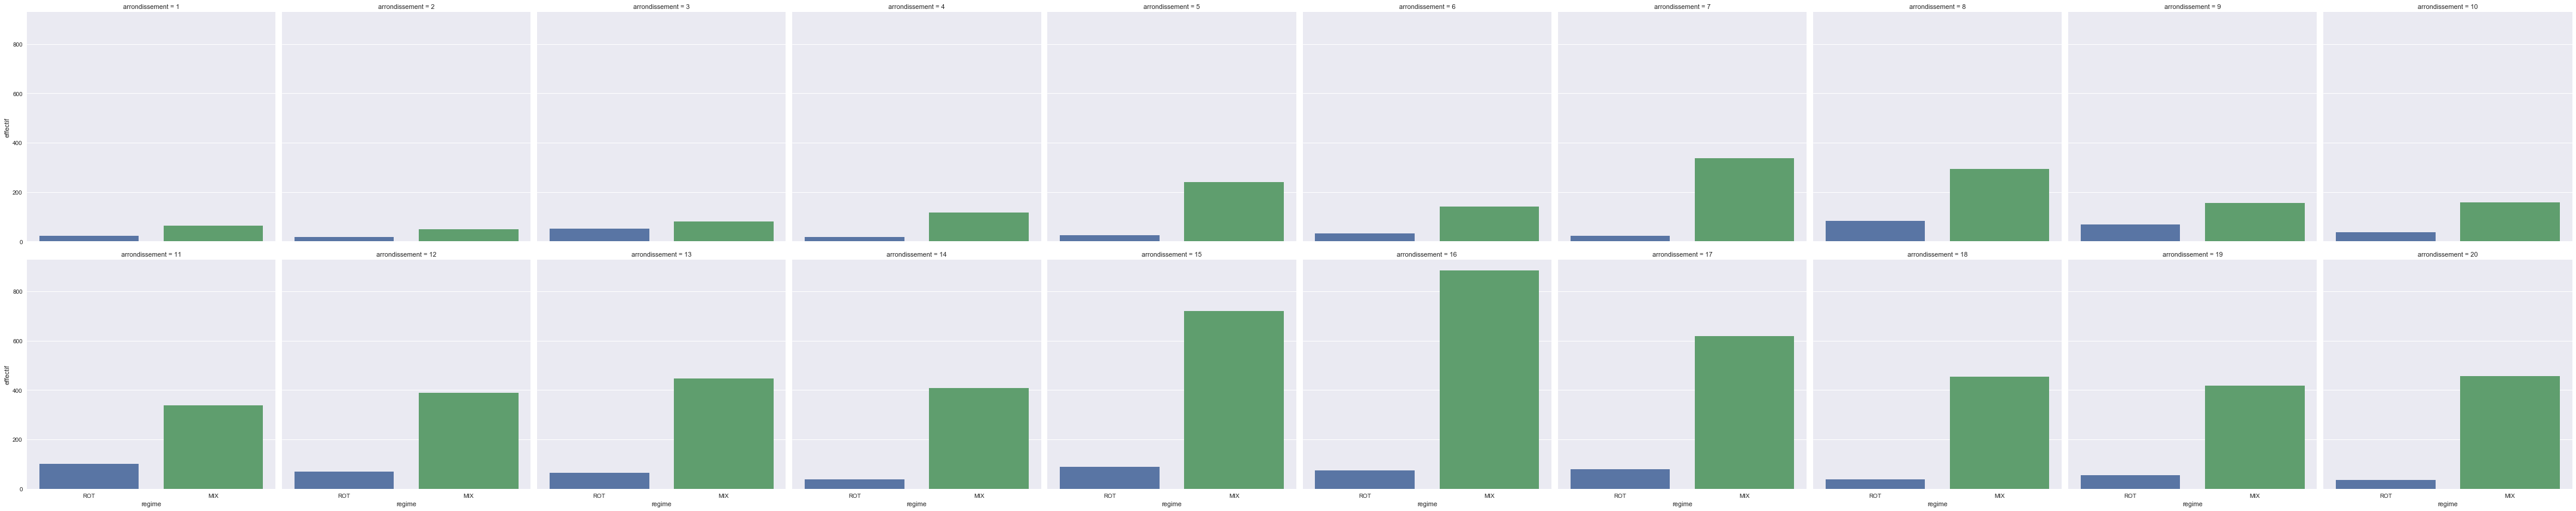

In [71]:
seaborn.factorplot(x = "regime", y = "effectif",
                   col = "arrondissement", col_wrap = 10,
                   data = df, kind = "bar", size = 6)

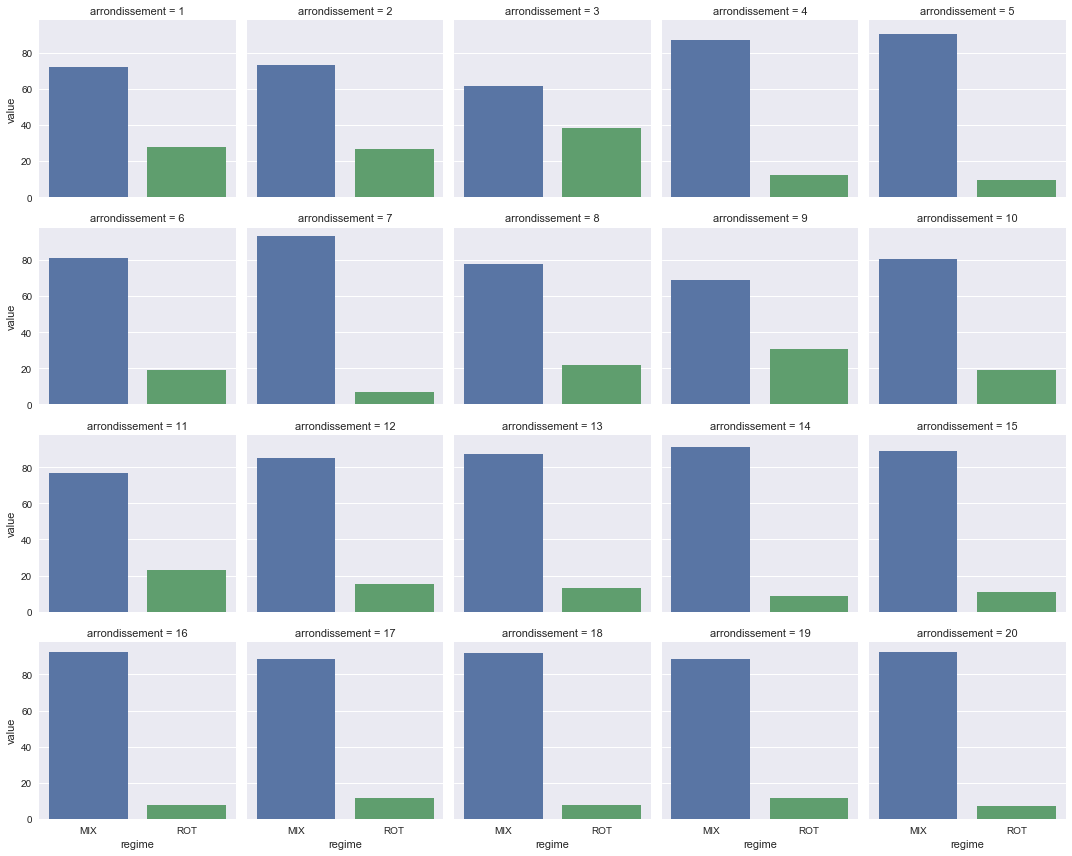

In [78]:
t = pandas.crosstab(df.regime, df.arrondissement, df.effectif, normalize = "columns", aggfunc = sum)
t = t.assign(regime = t.index)
tm = pandas.melt(t, id_vars = "regime")
tm = tm.assign(value = 100 * tm.value)

seaborn.factorplot(x = "regime", y = "value", 
                   col = "arrondissement", col_wrap = 5, 
                   data = tm, kind = "bar", size = 3)

### 5. Idem avec le tarif horaire (`tarifhor`)

In [79]:
res = list(horo.mobiliers.aggregate([
    { "$group" : { "_id" : { "tar" : "$fields.tarifhor", "arr" : "$fields.arrondt"}, "nb" : { "$sum" : 1}}},
    { "$project": { "tarif" : "$_id.tar", "arrondissement" : "$_id.arr", "effectif" : "$nb" }},
    { "$sort" : { "arrondissement" : 1}}
]))
df = pandas.DataFrame(res).drop("_id", 1)
df.head()

,arrondissement,effectif,tarif
0,1,87,4.0
1,2,67,4.0
2,3,133,4.0
3,4,135,4.0
4,5,267,4.0


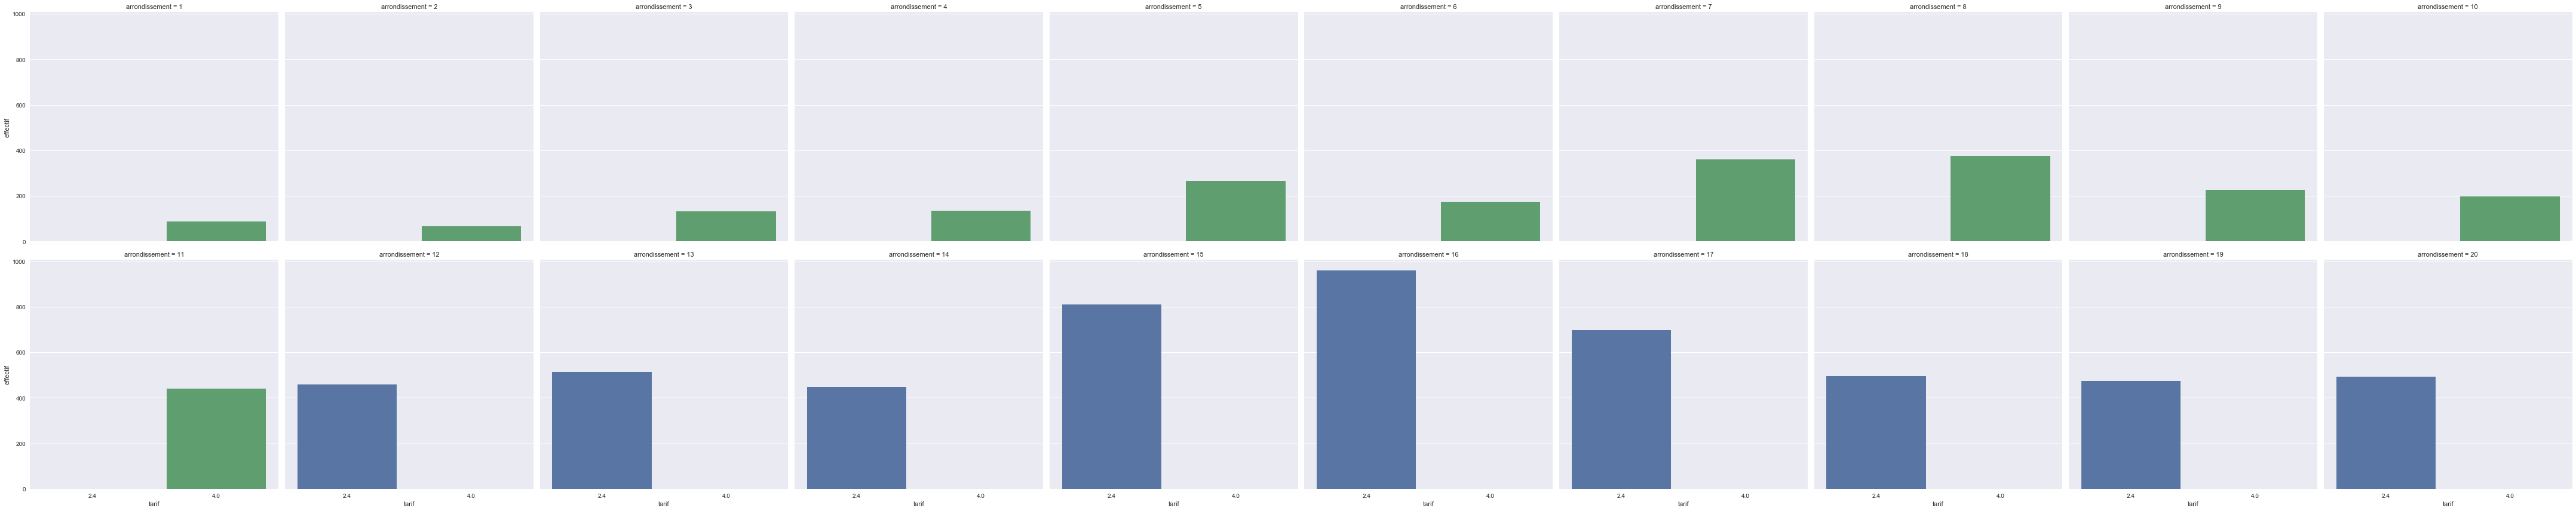

In [80]:
seaborn.factorplot(x = "tarif", y = "effectif",
                   col = "arrondissement", col_wrap = 10,
                   data = df, kind = "bar", size = 6)

## Transactions

### 1. Donner la distribution des montants payés (`montant carte`) et des durées payées (`durée payée (h)`)

In [ ]:
res = list(horo.transactions_small.find({}, {"_id": 0, "montant carte" : 1}))

In [ ]:
df = pandas.DataFrame(res)

In [ ]:
seaborn.distplot(df["montant carte"])

In [ ]:
seaborn.boxplot(x = "montant carte", data = df)

In [ ]:
seaborn.violinplot(x = "montant carte", data = df)

### 2. Lister les différents moyens de paiements utilisés (`moyen de paiement`) et le type d'usager (`usager`), en ordonnant chaque table résultat par ordre décroissant du nombre de paiements

In [ ]:
horo.transactions_small

### 3. Déterminer s'il existe un lien entre le moyen de paiement, et le montant d'une part et la durée d'autre part

## Jointures

### 1. Calculer le nombre de transactions par arrondissement

### 2. Calculer la répartition du type d'alimentation par arrondissement